## Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

#### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

#### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

#### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the dataset
data= pd.read_csv(r"C:\Users\malle\DataScience PG\All Datasets\WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
#checking the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Some columns need to be encoded for model building. 

In [4]:
#checking if there's any missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataset with 1470 observations and 34 columns.

No     1233
Yes     237
Name: Attrition, dtype: int64


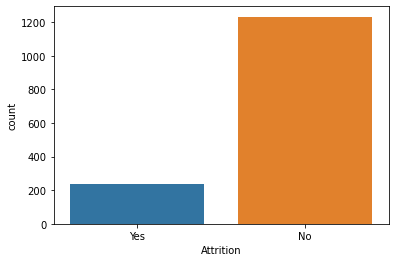

In [5]:
#checking if there's imbalance in the target varibale
print(data.Attrition.value_counts())
sns.countplot(x='Attrition',data=data)
plt.show()

The target varibalesm "Attrition" has,
- No     1233
- Yes     237

Our dataset is imbalanced.So, if we build the model based on this observatins. our model will be biased. Thus we need to make the dataset balanced.

In [6]:
#descriptive statistics
pd.set_option('display.max_columns',None)
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- Employee Number is just for reference purpose it does not give any insights wheather the employee has attrition or not.
- Employeecount has value 1 for all the Five Number Summary & Standarhours also have 80 in all the five number summary. Since, they have the same value for all the observation it doesn't give any usefull value for predicting the attrition.
- Over18 has same class 'y' which is also not usefull for prediction.

Thus Removing these columns from the dataset

In [7]:
#dropping those columns
data.drop(columns=['EmployeeNumber','EmployeeCount','StandardHours','Over18'],inplace=True)

In [8]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
#splitting the numercial, ordinal and nominal features
numercial_data= data[['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome',
                      'MonthlyRate']]
ordinal_data=pd.DataFrame()
for ordinal in data.columns:
    if ordinal not in numercial_data:
        
        ordinal_data[ordinal]= data[ordinal]
        
print(f'Numercial features:\n{numercial_data.columns}\n\n\nOrdinal features:\n{ordinal_data.columns}')

Numercial features:
Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate'],
      dtype='object')


Ordinal features:
Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


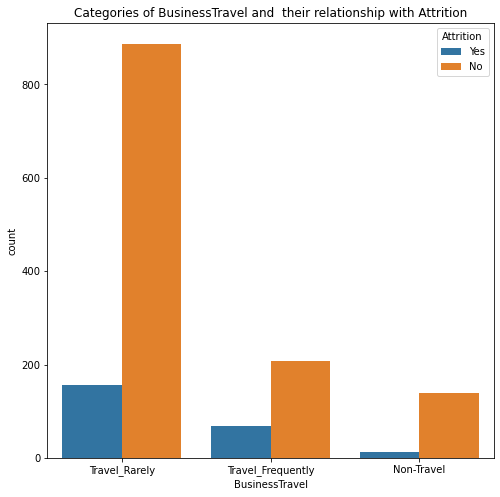

In [10]:
#seeing the number of classes in each categorical variables using countplot
#and its relation with the attrition
plt.figure(figsize=(8,8),facecolor='white')
print(data.BusinessTravel.value_counts())
sns.countplot(x='BusinessTravel',hue='Attrition',data=data)
plt.title('Categories of BusinessTravel and  their relationship with Attrition')
plt.show()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


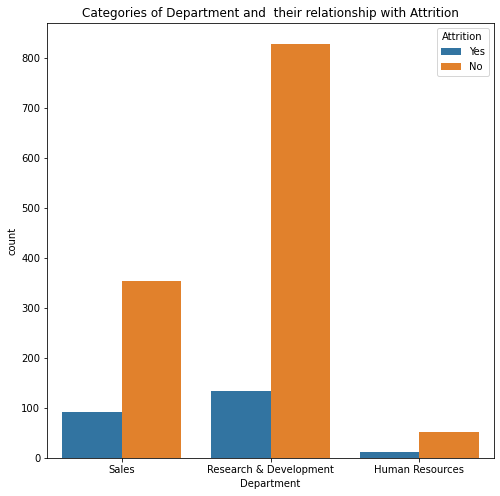

In [11]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.Department.value_counts())
sns.countplot(x='Department',hue='Attrition',data=data)
plt.title('Categories of Department and  their relationship with Attrition')
plt.show()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64


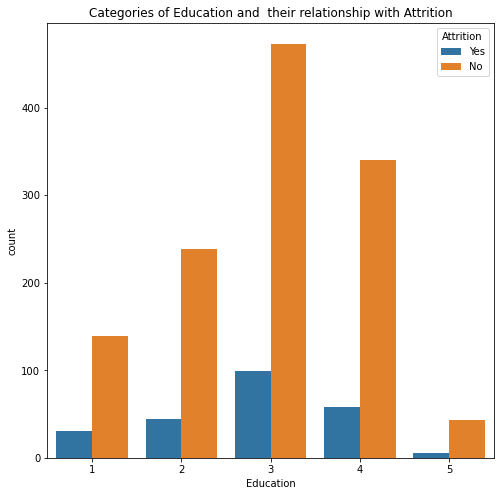

In [12]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.Education.value_counts())
sns.countplot(x='Education',hue='Attrition',data=data)
plt.title('Categories of Education and  their relationship with Attrition')
plt.show()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


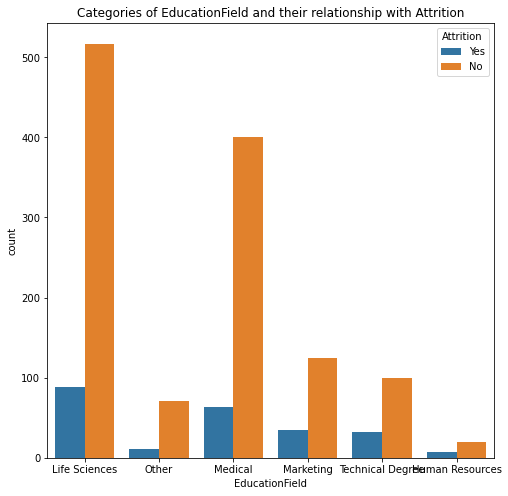

In [13]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.EducationField.value_counts())
sns.countplot(x='EducationField',hue='Attrition',data=data)
plt.title('Categories of EducationField and their relationship with Attrition')
plt.show()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64


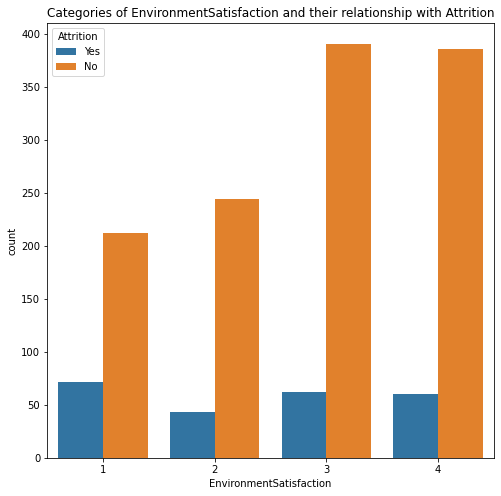

In [14]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.EnvironmentSatisfaction.value_counts())
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=data)
plt.title('Categories of EnvironmentSatisfaction and their relationship with Attrition')
plt.show()

Male      882
Female    588
Name: Gender, dtype: int64


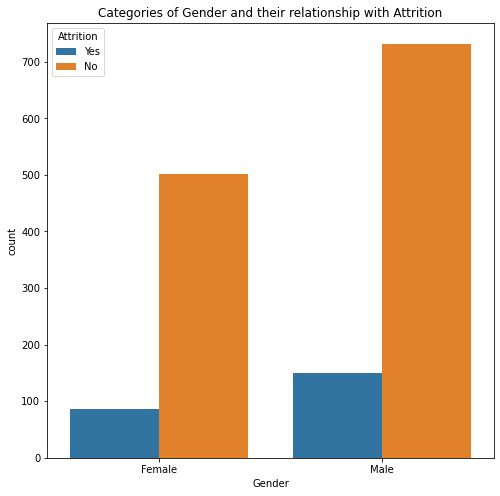

In [15]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.Gender.value_counts())
sns.countplot(x='Gender',hue='Attrition',data=data)
plt.title('Categories of Gender and their relationship with Attrition')
plt.show()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64


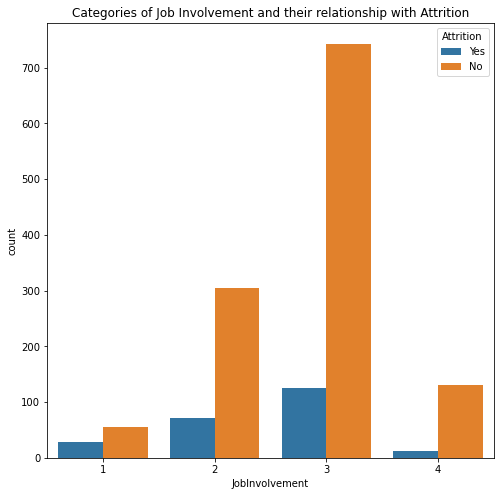

In [16]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.JobInvolvement.value_counts())
sns.countplot(x='JobInvolvement',hue='Attrition',data=data)
plt.title('Categories of Job Involvement and their relationship with Attrition')
plt.show()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64


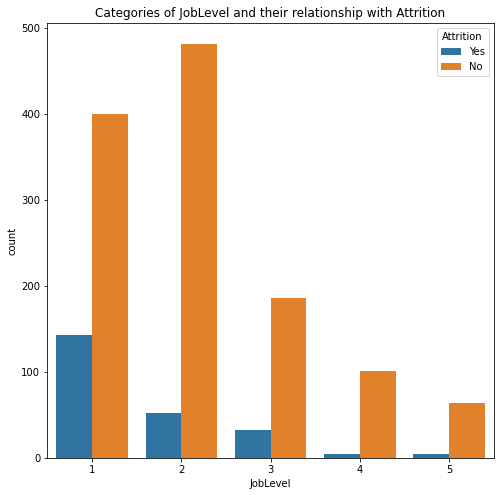

In [17]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.JobLevel.value_counts())
sns.countplot(x='JobLevel',hue='Attrition',data=data)
plt.title('Categories of JobLevel and their relationship with Attrition')
plt.show()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


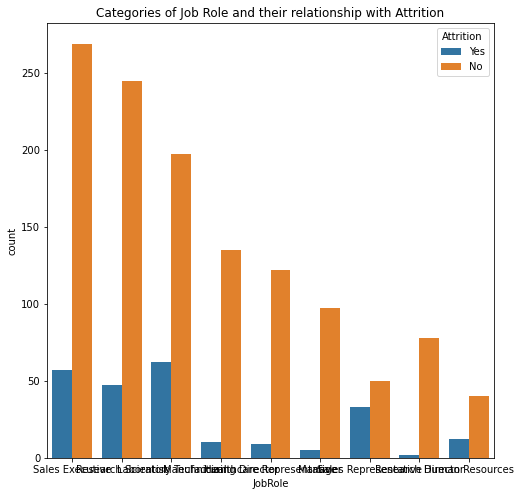

In [18]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.JobRole.value_counts())
sns.countplot(x='JobRole',hue='Attrition',data=data)
plt.title('Categories of Job Role and their relationship with Attrition')
plt.show()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


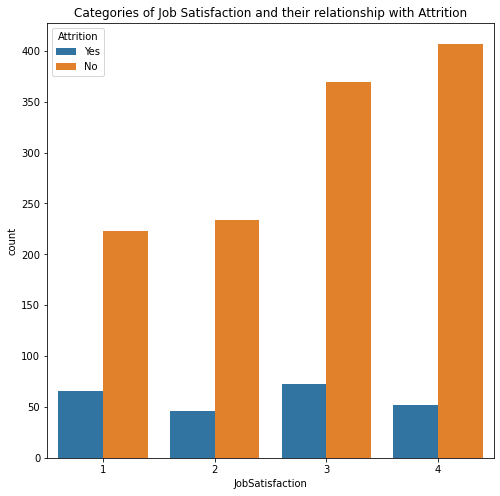

In [19]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.JobSatisfaction.value_counts())
sns.countplot(x='JobSatisfaction',hue='Attrition',data=data)
plt.title('Categories of Job Satisfaction and their relationship with Attrition')
plt.show()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


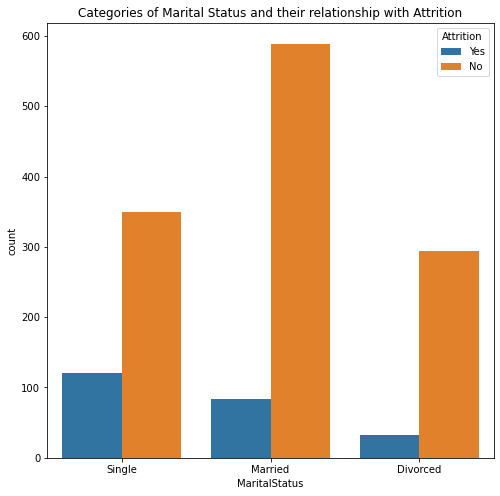

In [20]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.MaritalStatus.value_counts())
sns.countplot(x='MaritalStatus',hue='Attrition',data=data)
plt.title('Categories of Marital Status and their relationship with Attrition')
plt.show()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64


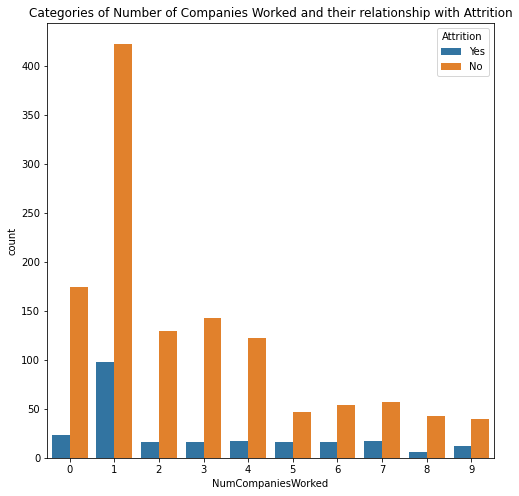

In [21]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.NumCompaniesWorked.value_counts())
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=data)
plt.title('Categories of Number of Companies Worked and their relationship with Attrition')
plt.show()

No     1054
Yes     416
Name: OverTime, dtype: int64


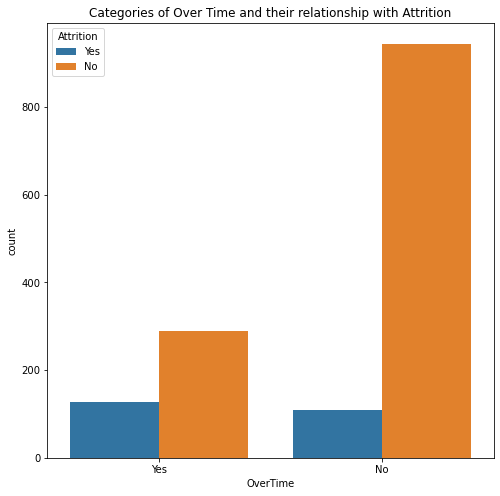

In [22]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.OverTime.value_counts())
sns.countplot(x='OverTime',hue='Attrition',data=data)
plt.title('Categories of Over Time and their relationship with Attrition')
plt.show()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64


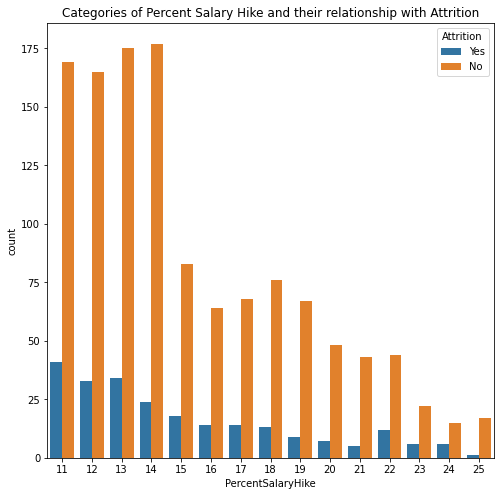

In [23]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.PercentSalaryHike.value_counts())
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=data)
plt.title('Categories of Percent Salary Hike and their relationship with Attrition')
plt.show()

3    1244
4     226
Name: PerformanceRating, dtype: int64


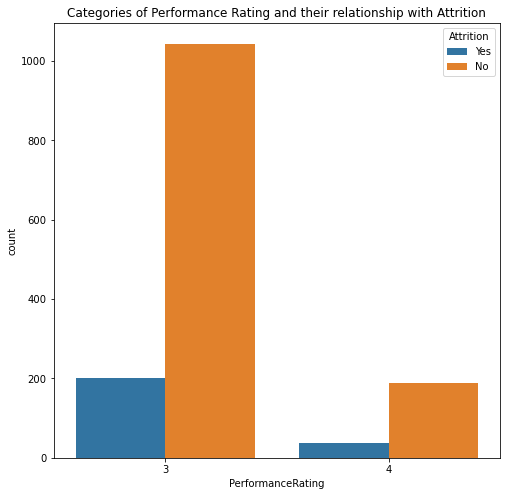

In [24]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.PerformanceRating.value_counts())
sns.countplot(x='PerformanceRating',hue='Attrition',data=data)
plt.title('Categories of Performance Rating and their relationship with Attrition')
plt.show()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64


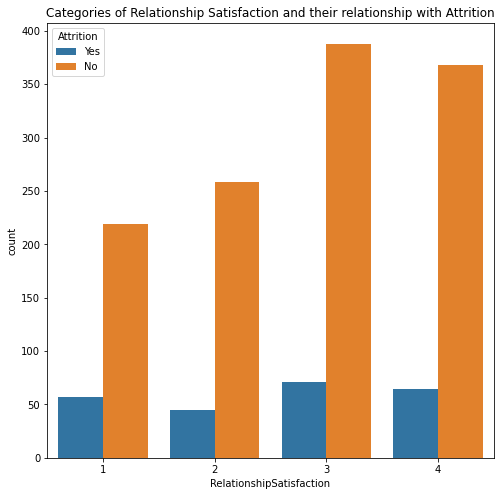

In [25]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.RelationshipSatisfaction.value_counts())
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=data)
plt.title('Categories of Relationship Satisfaction and their relationship with Attrition')
plt.show()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64


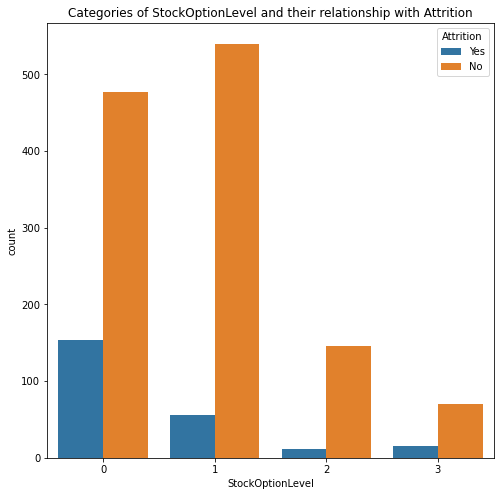

In [26]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.StockOptionLevel.value_counts())
sns.countplot(x='StockOptionLevel',hue='Attrition',data=data)
plt.title('Categories of StockOptionLevel and their relationship with Attrition')
plt.show()

10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: TotalWorkingYears, dtype: int64


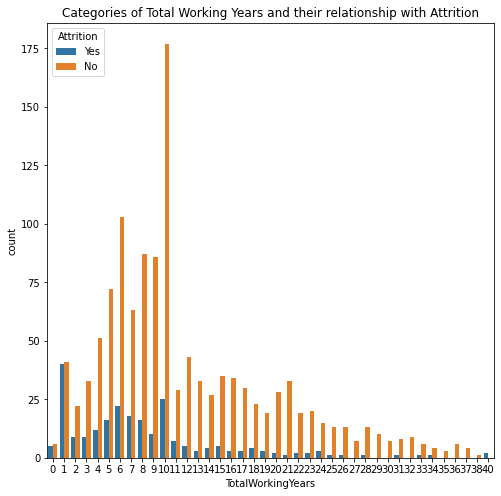

In [27]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.TotalWorkingYears.value_counts())
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=data)
plt.title('Categories of Total Working Years and their relationship with Attrition')
plt.show()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64


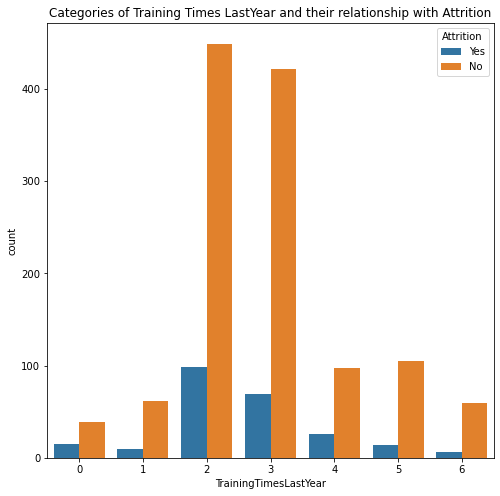

In [28]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.TrainingTimesLastYear.value_counts())
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=data)
plt.title('Categories of Training Times LastYear and their relationship with Attrition')
plt.show()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


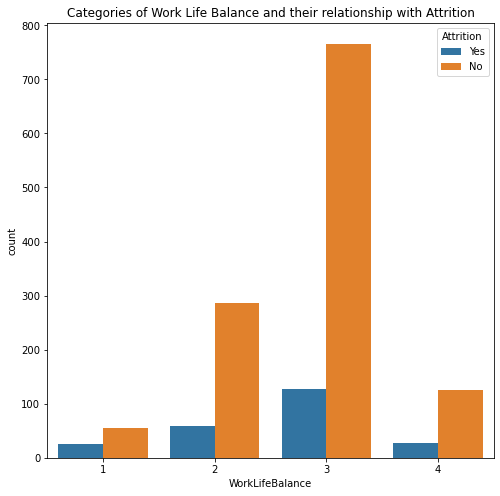

In [29]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.WorkLifeBalance.value_counts())
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=data)
plt.title('Categories of Work Life Balance and their relationship with Attrition')
plt.show()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64


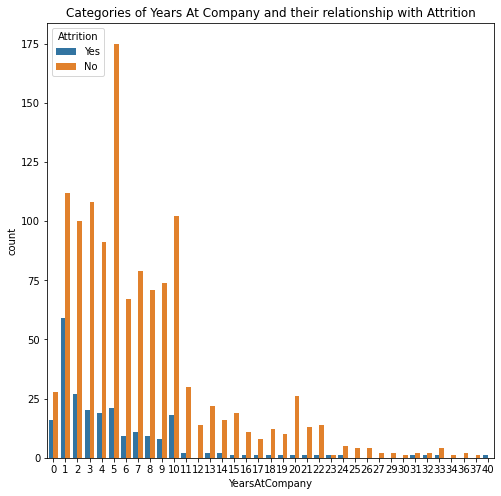

In [30]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.YearsAtCompany.value_counts())
sns.countplot(x='YearsAtCompany',hue='Attrition',data=data)
plt.title('Categories of Years At Company and their relationship with Attrition')
plt.show()

2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: YearsInCurrentRole, dtype: int64


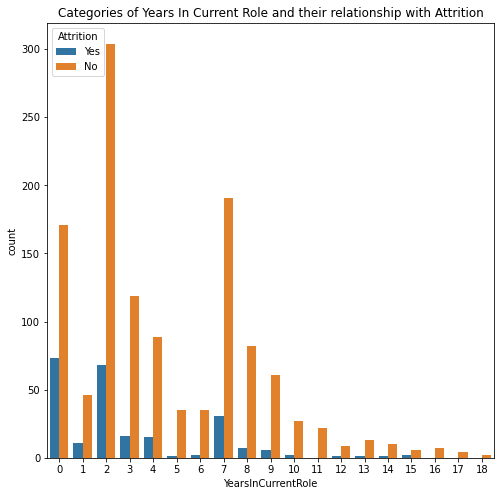

In [31]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.YearsInCurrentRole.value_counts())
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=data)
plt.title('Categories of Years In Current Role and their relationship with Attrition')
plt.show()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64


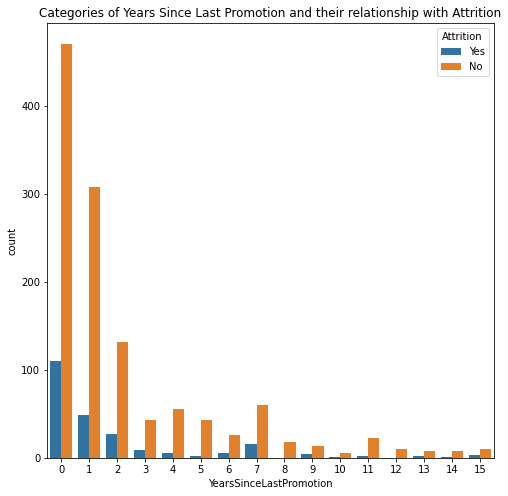

In [32]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.YearsSinceLastPromotion.value_counts())
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=data)
plt.title('Categories of Years Since Last Promotion and their relationship with Attrition')
plt.show()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64


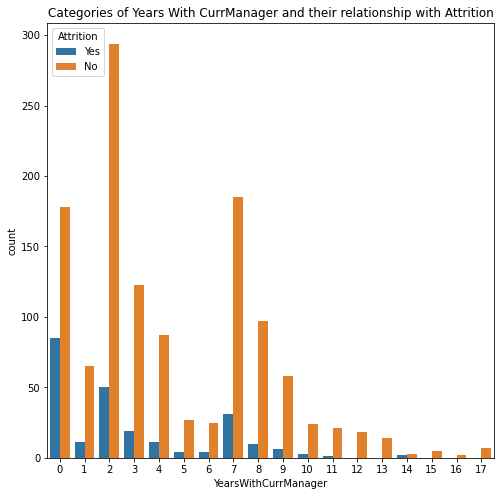

In [33]:
plt.figure(figsize=(8,8),facecolor='white')
print(data.YearsWithCurrManager.value_counts())
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=data)
plt.title('Categories of Years With CurrManager and their relationship with Attrition')
plt.show()

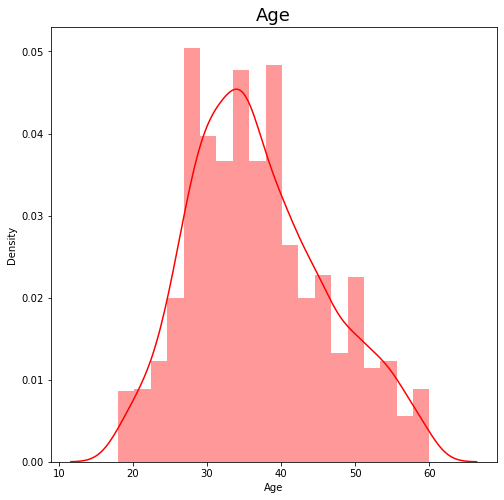

In [34]:
#seeing the data distribution of numerical variables 
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.Age,color='red')
plt.title("Age",fontsize=18)
plt.show()

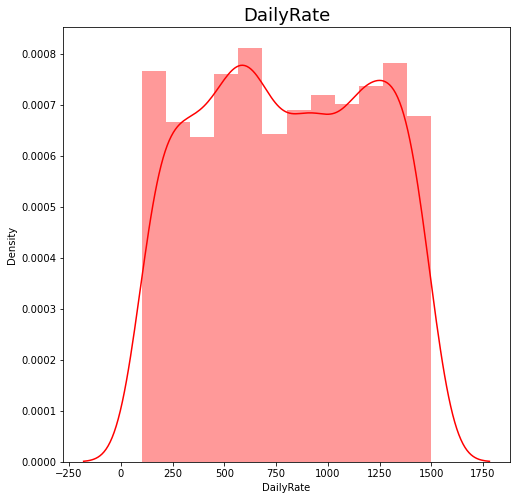

In [35]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.DailyRate,color='red')
plt.title("DailyRate",fontsize=18)
plt.show()

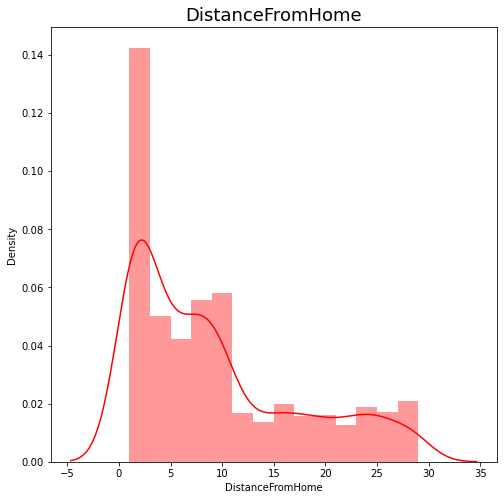

In [36]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.DistanceFromHome,color='red')
plt.title("DistanceFromHome",fontsize=18)
plt.show()

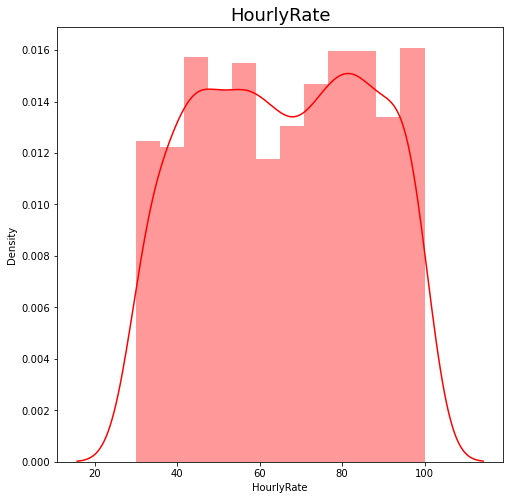

In [37]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.HourlyRate,color='red')
plt.title("HourlyRate",fontsize=18)
plt.show()

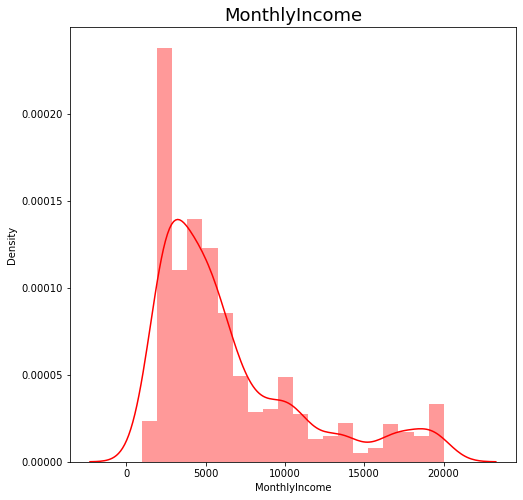

In [38]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.MonthlyIncome,color='red')
plt.title("MonthlyIncome",fontsize=18)
plt.show()

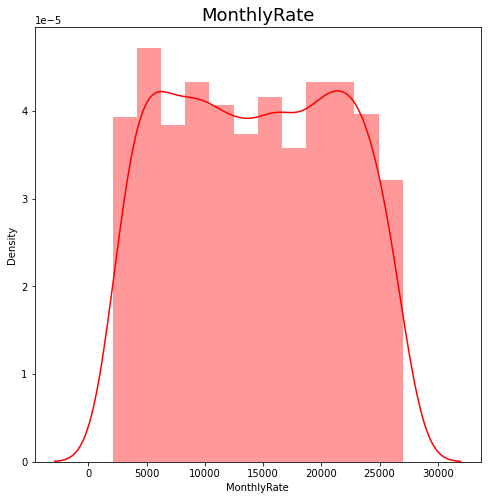

In [39]:
plt.figure(figsize=(8,8),facecolor='white')
sns.distplot(data.MonthlyRate,color='red')
plt.title("MonthlyRate",fontsize=18)
plt.show()

All the features has been represented in the form of graph. We can also see the relationship with Attrition prediction.

In [40]:
#Encoding the categorical datas to numerical for visualising the correlation with the target 
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

encoded_data=data.copy()
for column in data.columns:
    if data[column].dtype==object:
        encoded_data[column]=encoder.fit_transform(data[column])

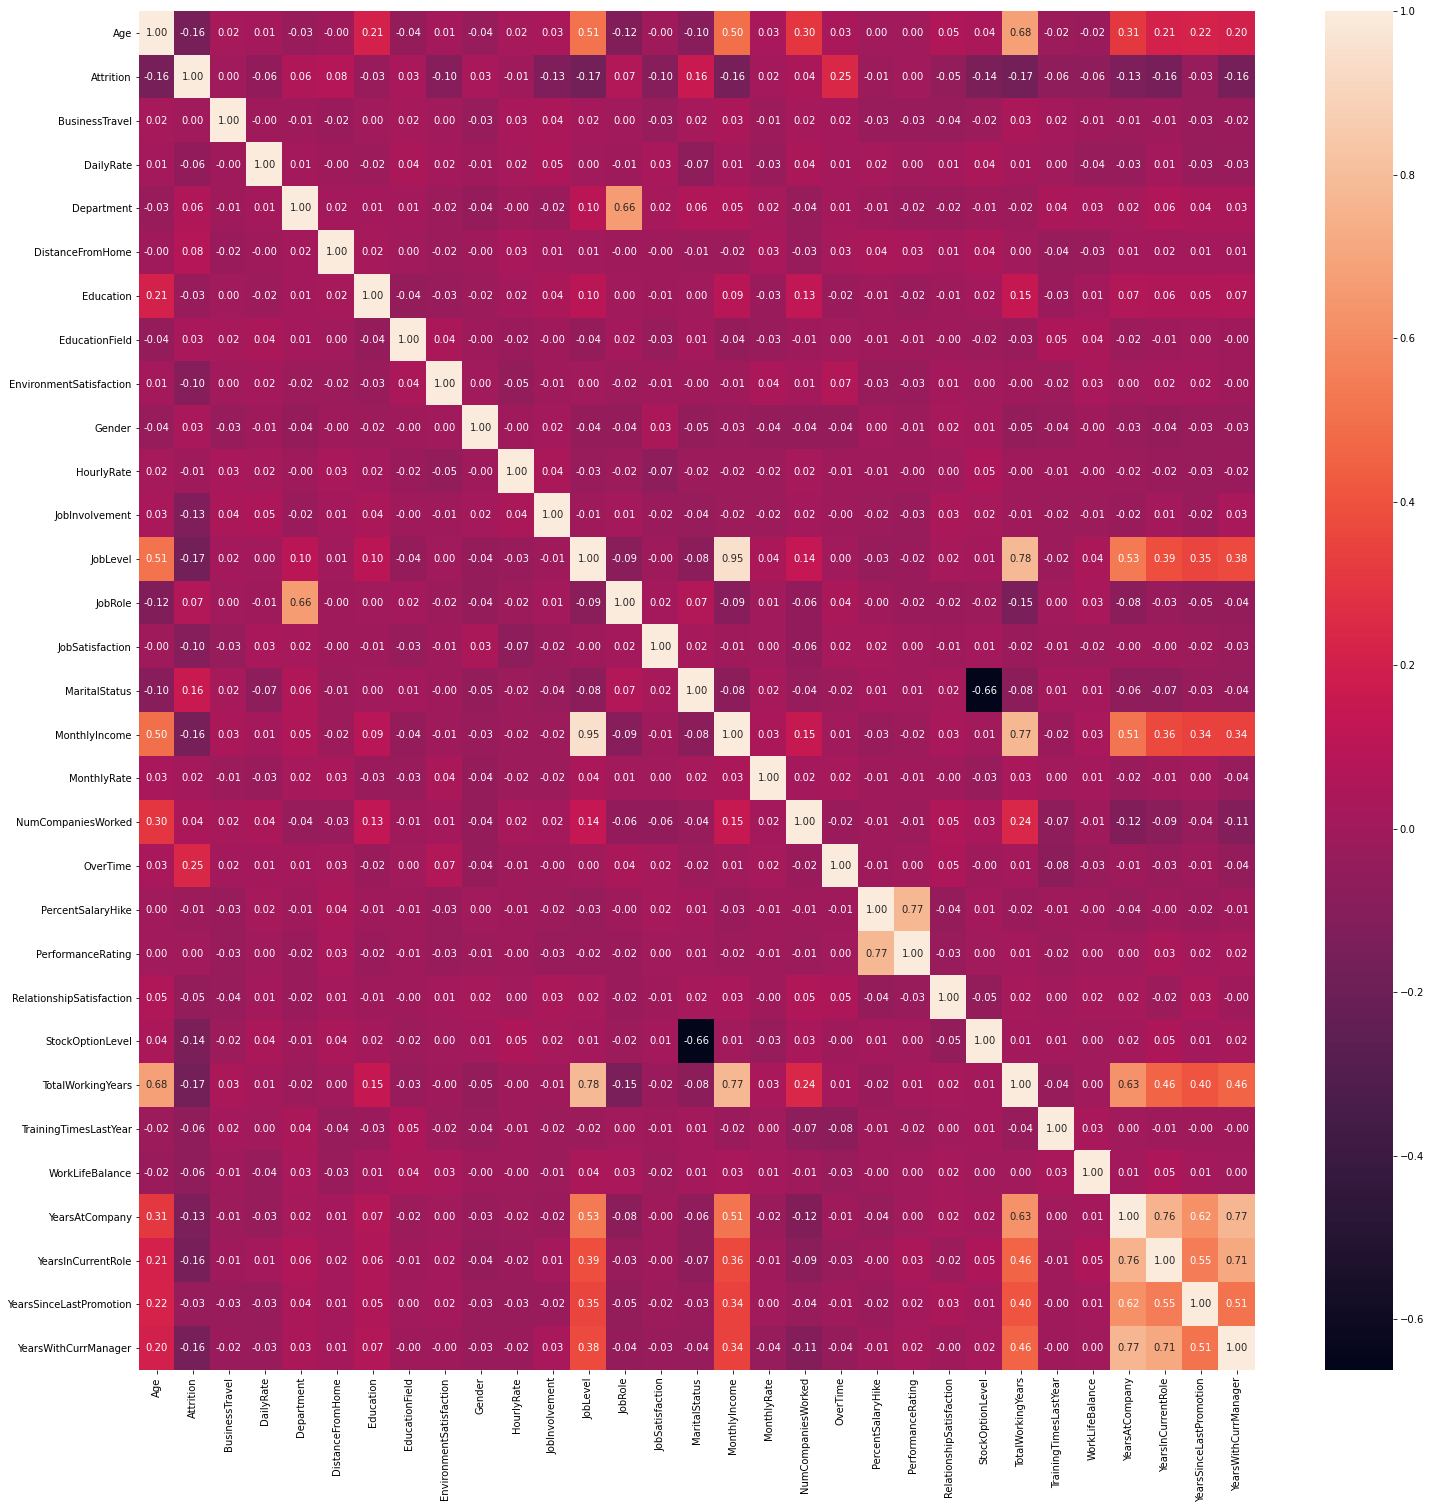

In [41]:
#checking the multicollinearity between the features
corr_data= encoded_data.corr()

plt.figure(figsize=(25,25),facecolor='white')
sns.heatmap(corr_data,annot=True,fmt='.2f')
plt.show()

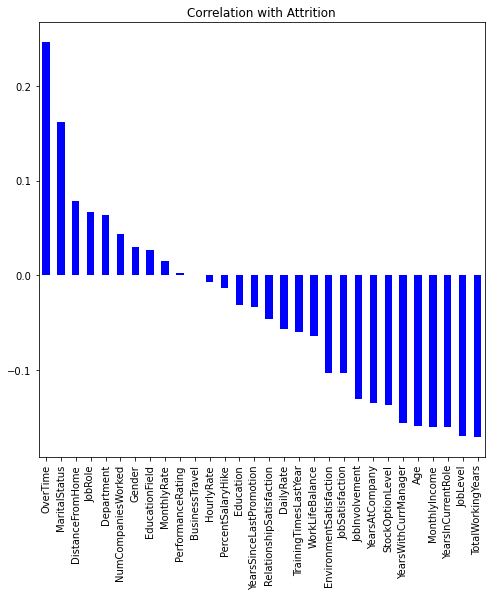

In [42]:
#correlation with the target
plt.figure(figsize=(8,8),facecolor='white')
corr_data.Attrition.sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='b',title='Correlation with Attrition')
plt.show()

Observation:
- There are some multicollinearity between Age, MonthlyIncome, TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.
- Attrition has high positively correlation with OverTime,MaritalStatus & highly negatively correlated with TotalWorkingYears,YearsInCurrentRole,JobLevel,MonthlyIncome,Age etc
- Attrition has less correlation with BusinessTravel.

In [43]:
#checking skewness in the numerical variables
numercial_data.skew()

Age                 0.413286
DailyRate          -0.003519
DistanceFromHome    0.958118
HourlyRate         -0.032311
MonthlyIncome       1.369817
MonthlyRate         0.018578
dtype: float64

Even if there's any skewness in the rest of the column. We don't need to worry because they are categorcial columns.

In [44]:
from sklearn.preprocessing import power_transform
numercial_data= pd.DataFrame(power_transform(numercial_data), columns=numercial_data.columns)
for column in numercial_data.columns:
    data[column]=numercial_data[column]

In [45]:
data.skew()

Age                        -0.007603
DailyRate                  -0.196160
DistanceFromHome           -0.007468
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.106461
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               0.000000
MonthlyRate                -0.184087
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [46]:
#checking outliers in the dataset 
from scipy.stats import zscore
index= data[np.abs(zscore(numercial_data))>3].index
print(data.shape,'Before removing the outliers')
data.drop(index=index,inplace=True)
print(data.shape,'After removing the outliers')

(1470, 31) Before removing the outliers
(1470, 31) After removing the outliers


Observation:
- There are no observations with zscore more than 3 standard deviations i.e There is no outliers in the numbercial features of the dataset.

**Building the Model**

In [47]:
#splitting the dataset
x= data.drop(columns='Attrition')
y=data.Attrition

In [48]:
#Encoding categorical varibales to numerical varibales for building the model
#encoding the target variable
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
y=encoder.fit_transform(y)

#encoding the features
encoding=pd.DataFrame()
for column in x.columns:
    if x[column].dtype==object:
        encoding[column]=x[column]
        
#creating dummies
dummies= pd.get_dummies(encoding)
#dropping the columns whose values are encoded
x.drop(columns=encoding.columns,inplace=True)
#joining the datasets
x=pd.concat([x,dummies],axis=1)
x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0.522140,0.759289,-1.494085,2,2,1.354630,3,2,4,0.0,0.747689,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,1.276411,-1.334597,0.243416,1,3,-0.210675,2,2,2,0.0,1.397293,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0.102091,1.340365,-1.031215,2,4,1.263094,2,1,3,0.0,-1.882611,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,-0.353971,1.379936,-0.700347,4,4,-0.460197,3,1,3,0.0,1.193001,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,-1.123755,-0.453941,-1.031215,1,1,-1.289301,3,1,2,0.0,0.386371,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.008279,0.264672,1.407126,2,3,-1.235882,4,2,4,0.0,-0.201548,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,0.316210,-0.397219,-0.050827,1,4,-1.182703,2,3,1,0.0,0.989784,4,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,-1.123755,-1.751713,-0.442291,3,2,1.032601,4,2,2,0.0,-1.325846,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,1.276411,0.583235,-1.031215,3,4,-0.111945,2,2,2,0.0,-0.067983,2,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [49]:
#importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [50]:
#selecting the best random state with best score
max_score=0
trainscore=0
maxrs=0
for i in range(0,1000):
    lr= LogisticRegression()
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    train_pred= lr.predict(x_train)
    test_pred= lr.predict(x_test)
    score= accuracy_score(y_test,test_pred)
    trainscore= accuracy_score(y_train,train_pred)
    if round(score,3)==round(trainscore,3):
        print(f'At random state {i} the training accuracy is {trainscore} and test accuracy is {score}')
    

At random state 41 the training accuracy is 0.891156462585034 and test accuracy is 0.891156462585034
At random state 123 the training accuracy is 0.891156462585034 and test accuracy is 0.891156462585034
At random state 233 the training accuracy is 0.8835034013605442 and test accuracy is 0.8843537414965986
At random state 256 the training accuracy is 0.8877551020408163 and test accuracy is 0.8877551020408163
At random state 261 the training accuracy is 0.891156462585034 and test accuracy is 0.891156462585034
At random state 283 the training accuracy is 0.891156462585034 and test accuracy is 0.891156462585034
At random state 309 the training accuracy is 0.891156462585034 and test accuracy is 0.891156462585034
At random state 312 the training accuracy is 0.8809523809523809 and test accuracy is 0.8809523809523809
At random state 350 the training accuracy is 0.8945578231292517 and test accuracy is 0.8945578231292517
At random state 357 the training accuracy is 0.8945578231292517 and test ac

Selecting the best random state as 41 which gives a accuracy of about 89% in both test and train dataset.

In [51]:
#splitting the dataset into train and test with the best random state
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=41)

In [52]:
#Synthetic Minority Oversampling Technique for imbalanced dataset
from imblearn.over_sampling import SMOTE
imb= SMOTE(0.75)
x_train,y_train= imb.fit_resample(x_train,y_train)

In [53]:
#selecting the best k-fold for cross validation score
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvs= cross_val_score(lr,x,y,cv=j)
    cvs_mean= cvs.mean()
    print(f'At cross fold {j} cross value score is {cvs_mean}')

At cross fold 2 cross value score is 0.8789115646258503
At cross fold 3 cross value score is 0.8802721088435375
At cross fold 4 cross value score is 0.8829837252695178
At cross fold 5 cross value score is 0.8829931972789116
At cross fold 6 cross value score is 0.8802721088435373
At cross fold 7 cross value score is 0.8829931972789117
At cross fold 8 cross value score is 0.8775577631266334
At cross fold 9 cross value score is 0.8822883934360815


Cross fold value 4 gives best score. so, we select 4.

In [54]:
#LogisticRegression

LR= LogisticRegression()
LR.fit(x_train,y_train)
y_pred= LR.predict(x_test)

#cross valuation
cvs= cross_val_score(LR,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8858695652173914
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8829931972789116
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[303  15]
 [ 27  23]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       318
           1       0.61      0.46      0.52        50

    accuracy                           0.89       368
   macro avg       0.76      0.71      0.73       368
weighted avg       0.88      0.89      0.88       368



In [55]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)

#cross valuation
cvs= cross_val_score(rf,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8940217391304348
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8564625850340135
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[314   4]
 [ 35  15]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       318
           1       0.79      0.30      0.43        50

    accuracy                           0.89       368
   macro avg       0.84      0.64      0.69       368
weighted avg       0.88      0.89      0.87       368



In [56]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred= dt.predict(x_test)

#cross valuation
cvs= cross_val_score(dt,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.7880434782608695
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.7843537414965985
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[266  52]
 [ 26  24]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       318
           1       0.32      0.48      0.38        50

    accuracy                           0.79       368
   macro avg       0.61      0.66      0.63       368
weighted avg       0.83      0.79      0.81       368



In [57]:
#Gradient Boost Classifier
from sklearn.ensemble import GradientBoostingClassifier

gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred= gb.predict(x_test)

#cross valuation
cvs= cross_val_score(gb,x,y,cv=7)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8831521739130435
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8721088435374149
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[306  12]
 [ 31  19]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       318
           1       0.61      0.38      0.47        50

    accuracy                           0.88       368
   macro avg       0.76      0.67      0.70       368
weighted avg       0.87      0.88      0.87       368



In [58]:
#support vector classifier
from sklearn.svm import SVC

svc= SVC()
svc.fit(x_train,y_train)
y_pred= svc.predict(x_test)

#cross valuation
cvs= cross_val_score(svc,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy 0.8804347826086957
----------------------------------------------------------------------------------------------------
Cross Validation Score 0.8387755102040817
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[303  15]
 [ 29  21]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       318
           1       0.58      0.42      0.49        50

    accuracy                           0.88       368
   macro avg       0.75      0.69      0.71       368
weighted avg       0.87      0.88      0.87       368



In [59]:
from xgboost import XGBClassifier
xgb= XGBClassifier()
xgb.fit(x_train,y_train)
y_pred= xgb.predict(x_test)

#cross valuation
cvs= cross_val_score(xgb,x,y,cv=5)
cvs_mean= cvs.mean()

print("Accuracy", accuracy_score(y_test,y_pred))
print('-'*100)
print("Cross Validation Score", cvs_mean)
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

[18:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

<Figure size 720x720 with 0 Axes>

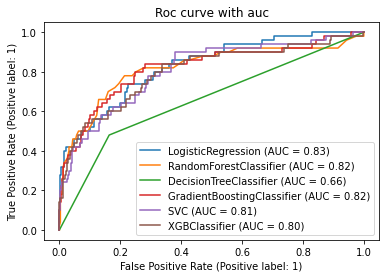

In [60]:
#plotting Roc curve and auc to finding the best model
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(10,10),facecolor='white')
chart= plot_roc_curve(LR,x_test,y_test)
plot_roc_curve(rf,x_test,y_test,ax=chart.ax_)
plot_roc_curve(dt,x_test,y_test,ax=chart.ax_)
plot_roc_curve(gb,x_test,y_test,ax=chart.ax_)
plot_roc_curve(svc,x_test,y_test,ax=chart.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=chart.ax_)
plt.title('Roc curve with auc')
plt.show()

**We will do hyperparameter tuning for the Gradient Boosting Classifier because it has the highest area under the curve when compared with the other model.**

In [61]:
#hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

gb= GradientBoostingClassifier()
param= {"n_estimators":[5,25,50,100],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1],
        "min_samples_leaf":[2,3,4,5],
        "min_samples_split":[2,3,4,5]}

grp= GridSearchCV(gb,param_grid=param)
grp.fit(x_train,y_train)
print(grp.best_params_)

{'learning_rate': 1, 'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 50}


In [62]:
#model after hyperparameter tuning
gb= grp.best_estimator_ 
gb.fit(x_train,y_train)

#predict
y_pred= gb.predict(x_test)

#accuracy score
print("Accuracy\n", accuracy_score(y_test,y_pred))
print('-'*100)
print("Confusion Matrix\n", confusion_matrix(y_test,y_pred))
print('-'*100)
print(classification_report(y_test,y_pred))

Accuracy
 0.8858695652173914
----------------------------------------------------------------------------------------------------
Confusion Matrix
 [[306  12]
 [ 30  20]]
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       318
           1       0.62      0.40      0.49        50

    accuracy                           0.89       368
   macro avg       0.77      0.68      0.71       368
weighted avg       0.87      0.89      0.87       368



**The Model gives accuracy score of 89%, which is good improvement. Saving the model for further predictions.**

In [63]:
#saving our trained model
import pickle
pickle.dump(gb,open('HR_Analytics.pkl','wb'))